# Task 3: Customer Churn Prediction (Bank Customers)

## Objective:
Identify customers who are likely to leave the bank.

## Dataset:
**Churn Modelling Dataset**

## Instructions:
- Clean and prepare the dataset.
- Encode categorical features such as geography and gender.
- Train a classification model.
- Analyze feature importance to understand what influences churn.

## Skills:
- Categorical data encoding (Label Encoding / One-Hot Encoding)
- Supervised classification modeling
- Understanding and interpreting feature importance

#### Step 1: Import the required libraries

In [171]:
!pip install kaggle

In [172]:
# For operating system operations (file paths, directories)
import os
# For extracting zip files
import zipfile
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
# Warning suppression
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')


#### Step 2: Downloading and Extracting Dataset from Kaggle

In [173]:
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/Honest/.kaggle/kaggle.json"

In [174]:
!kaggle datasets download -d aakash50897/churn-modellingcsv

Dataset URL: https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv
License(s): unknown
churn-modellingcsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [175]:
print(os.listdir())

['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.VirtualBox', '.zenmap', '3D Objects', 'anaconda3', 'AppData', 'Application Data', 'best_churn_model.pkl', 'churn-modelling', 'churn-modellingcsv.zip', 'cleaned_data_housing.csv', 'coffee.csv', 'Contacts', 'Cookies', 'Customer_Churn_Prediction(Bank Customers).ipynb', 'Data', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'housing.csv', 'IntelGraphicsProfiles', 'iris.csv', 'iris_dataset.ipynb', 'Links', 'loan-prediction-problem-dataset.zip', 'loan_prediction_dataset', 'loan_prediction_dataset.ipynb', 'Local Settings', 'Microsoft', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TM.blf', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer0000000000

In [176]:
with zipfile.ZipFile("churn-modellingcsv.zip", "r") as zip_ref:
    zip_ref.extractall("churn-modelling")

print("Extracted Files:", os.listdir("churn-modelling"))


Extracted Files: ['Churn_Modelling.csv']


#### Step 3: Read the dataset

In [177]:
df = pd.read_csv("churn-modelling/Churn_Modelling.csv")

#### Step 4: Inspect the dataset structure 

In [178]:
# Check the shape (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (10000, 14)


In [179]:
# Display column names
print("Column names:", df.columns)

Column names: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [180]:
# Display first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
# Display last 5 rows 
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [182]:
# Shows column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [183]:
# Shows how many missing values in each column
df.isnull().sum()  

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [184]:
# summary statistics for numerical columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [185]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} : {df[col].unique()}")  # Unique values per categorical column


Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [186]:
print("\nDataset Columns:")
print(df.columns.tolist())



Dataset Columns:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [187]:
print("\nData Types:")
print(df.dtypes)


Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


#### Step 5: Data Cleaning and Preparation

In [188]:
# Create a copy of the original dataframe
df_clean = df.copy()

In [189]:
# Drop unnecessary columns that won't help in prediction
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_clean = df_clean.drop(columns_to_drop, axis=1)
print(f"After dropping unnecessary columns: {df_clean.shape}")

After dropping unnecessary columns: (10000, 11)


In [190]:
# Check for duplicate rows
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [191]:
# Check for missing values
missing_values = df_clean.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [192]:
# Check the distribution of the target variable
print("\nTarget Variable Distribution (Exited):")
target_distribution = df_clean['Exited'].value_counts()
print(target_distribution)
print("\nTarget Variable Percentage:")
target_percentage = df_clean['Exited'].value_counts(normalize=True) * 100
print(target_percentage)


Target Variable Distribution (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64

Target Variable Percentage:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [193]:
print(f"\nDataset after cleaning: {df_clean.shape}")
print(f"Columns remaining: {df_clean.columns.tolist()}")


Dataset after cleaning: (10000, 11)
Columns remaining: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [194]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Step 6: Exploratory Data Analysis (EDA)

#### Target Variable Distribution

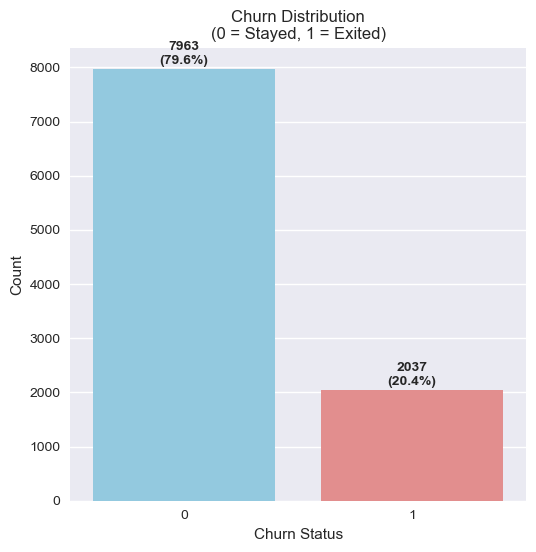

In [195]:
#Target variable distribution
plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
sns.countplot(x='Exited', data=df_clean, palette=['skyblue', 'lightcoral'])
plt.title('Churn Distribution\n(0 = Stayed, 1 = Exited)')
plt.xlabel('Churn Status')
plt.ylabel('Count')

for i, (index, value) in enumerate(target_distribution.items()):
    plt.text(i, value + 50, f'{value}\n({target_percentage[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')


#### Categorical Feature Analysis

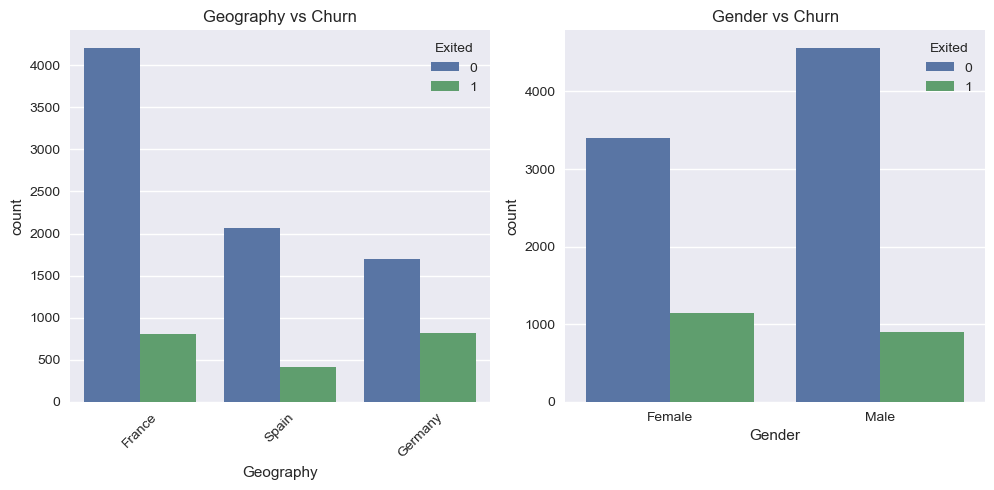

In [196]:
# Categorical Feature Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Geography', hue='Exited', data=df_clean)
plt.title('Geography vs Churn')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='Gender', hue='Exited', data=df_clean)
plt.title('Gender vs Churn')

plt.tight_layout()
plt.show()

#### Numerical Feature Analysis

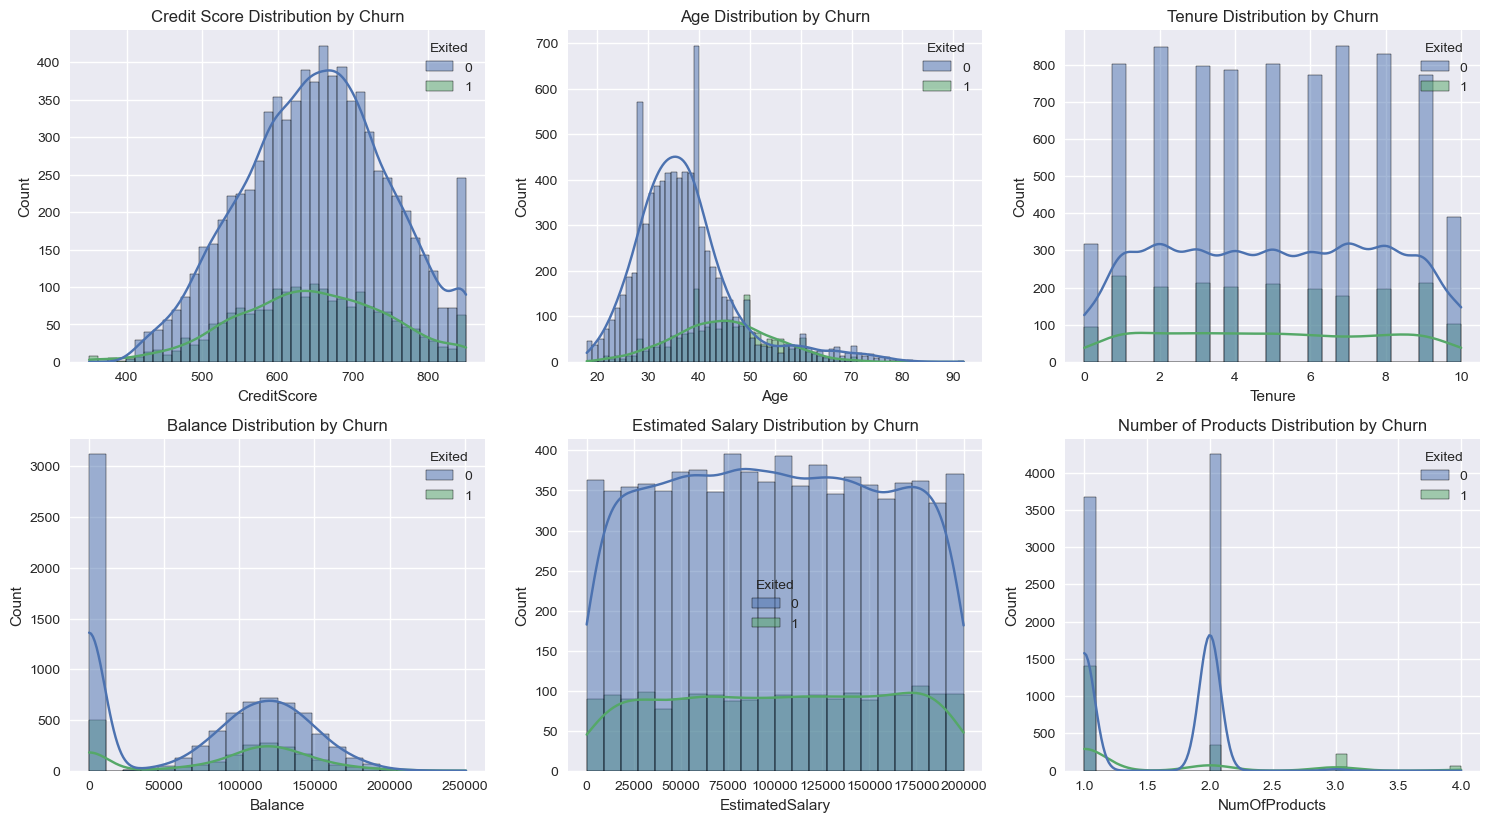

In [197]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 3, 1)
sns.histplot(data=df_clean, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn')

plt.subplot(3, 3, 2)
sns.histplot(data=df_clean, x='Age', hue='Exited', kde=True)
plt.title('Age Distribution by Churn')

plt.subplot(3, 3, 3)
sns.histplot(data=df_clean, x='Tenure', hue='Exited', kde=True)
plt.title('Tenure Distribution by Churn')

plt.subplot(3, 3, 4)
sns.histplot(data=df_clean, x='Balance', hue='Exited', kde=True)
plt.title('Balance Distribution by Churn')

plt.subplot(3, 3, 5)
sns.histplot(data=df_clean, x='EstimatedSalary', hue='Exited', kde=True)
plt.title('Estimated Salary Distribution by Churn')

plt.subplot(3, 3, 6)
sns.histplot(data=df_clean, x='NumOfProducts', hue='Exited', kde=True)
plt.title('Number of Products Distribution by Churn')

plt.tight_layout()
plt.show()


#### Binary Features Analysis

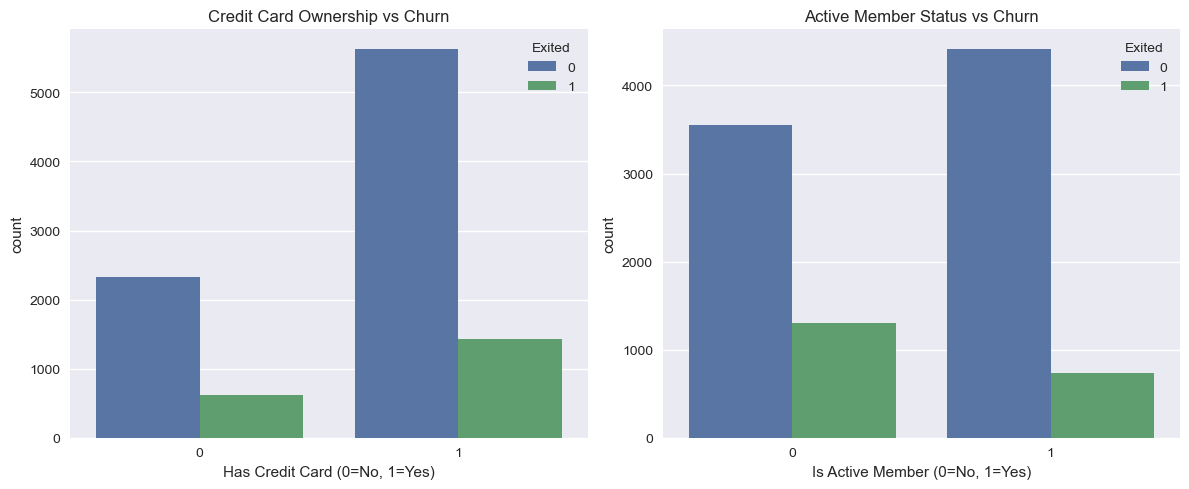

In [198]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='HasCrCard', hue='Exited', data=df_clean)
plt.title('Credit Card Ownership vs Churn')
plt.xlabel('Has Credit Card (0=No, 1=Yes)')

plt.subplot(1, 2, 2)
sns.countplot(x='IsActiveMember', hue='Exited', data=df_clean)
plt.title('Active Member Status vs Churn')
plt.xlabel('Is Active Member (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

#### Correlation Analysis

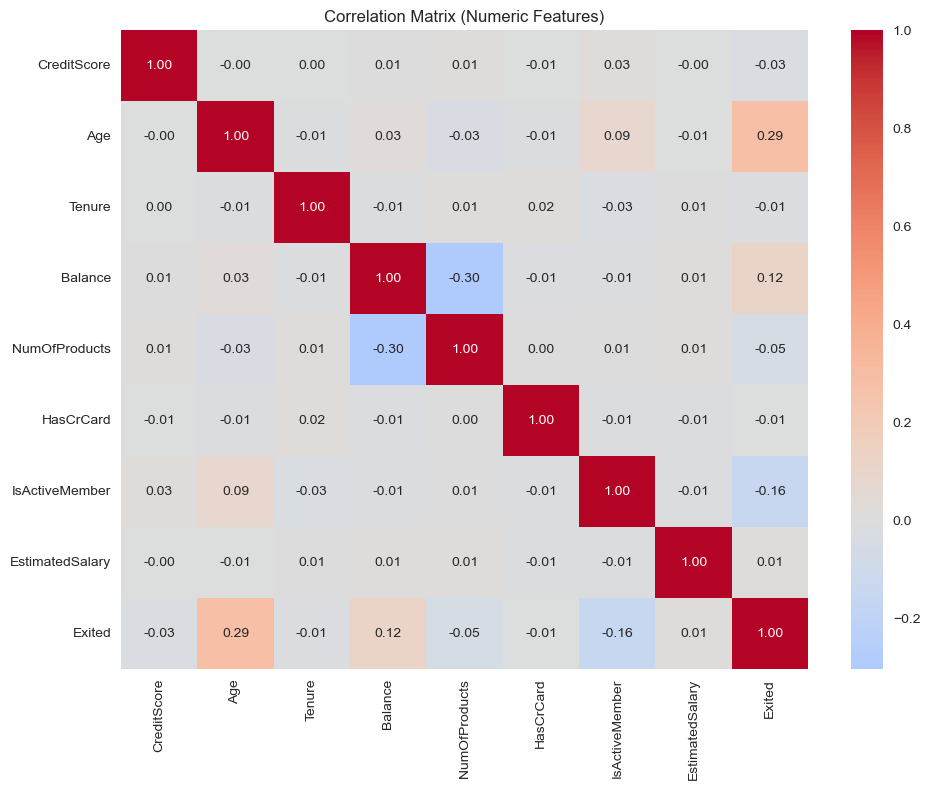

In [199]:
# Correlation Analysis (Numeric Columns Only)
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                   'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix (Numeric Features)')
plt.tight_layout()
plt.show()

#### Complete Statistical Analysis

In [200]:
# 1. Numerical Features Summary
print("1. NUMERICAL FEATURES SUMMARY:")
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
numerical_stats = df_clean.groupby('Exited')[numerical_cols].agg(['mean', 'median', 'std']).round(2)
print(numerical_stats)

# 2. Categorical Features Churn Rates
print("\n2. CATEGORICAL FEATURES CHURN RATES:")
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean.groupby(col)['Exited'].mean().round(3))

# 3. Binary Features Churn Rates  
print("\n3. BINARY FEATURES CHURN RATES:")
binary_cols = ['HasCrCard', 'IsActiveMember']
for col in binary_cols:
    print(f"\n{col}:")
    print(df_clean.groupby(col)['Exited'].mean().round(3))


1. NUMERICAL FEATURES SUMMARY:
       CreditScore                   Age               Tenure               \
              mean median     std   mean median    std   mean median   std   
Exited                                                                       
0           651.85  653.0   95.65  37.41   36.0  10.13   5.03    5.0  2.88   
1           645.35  646.0  100.32  44.84   45.0   9.76   4.93    5.0  2.94   

         Balance                      NumOfProducts               \
            mean     median       std          mean median   std   
Exited                                                             
0       72745.30   92072.68  62848.04          1.54    2.0  0.51   
1       91108.54  109349.29  58360.79          1.48    1.0  0.80   

       EstimatedSalary                       
                  mean     median       std  
Exited                                       
0             99738.39   99645.04  57405.59  
1            101465.68  102460.84  57912.42  

2. CAT

#### Step 7: Data Preprocessing

In [201]:
# Create a copy for preprocessing
df_processed = df_clean.copy()

#### Encode Categorical variables

In [202]:
# Encode Categorical Variables
print("Original categorical values:")
print("Geography:", df_processed['Geography'].unique())
print("Gender:", df_processed['Gender'].unique())

Original categorical values:
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


#### label Encoding/One-Hot Encoding

In [203]:
# One-Hot Encoding for Geography (nominal variable)
df_encoded = pd.get_dummies(df_processed, columns=['Geography'], prefix='Geo', drop_first=True)

In [204]:
# Label Encoding for Gender (binary variable)
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

In [205]:
# 0: Female, 1: Male
print(f"\nAfter encoding - Dataset shape: {df_encoded.shape}")
print("Columns after encoding:", df_encoded.columns.tolist())
print("\nFirst 3 rows after encoding:")
print(df_encoded.head(3))


After encoding - Dataset shape: (10000, 12)
Columns after encoding: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geo_Germany', 'Geo_Spain']

First 3 rows after encoding:
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   

   IsActiveMember  EstimatedSalary  Exited  Geo_Germany  Geo_Spain  
0               1        101348.88       1        False      False  
1               1        112542.58       0        False       True  
2               0        113931.57       1        False      False  


#### Seperate Features and Target

In [206]:
# Separate Features and Target
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

In [207]:
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (10000, 11)
Target shape: (10000,)


#### Split the data

In [208]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [209]:
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training set churn rate: {y_train.mean():.3f}")
print(f"Testing set churn rate: {y_test.mean():.3f}")


Training set: 8000 samples
Testing set: 2000 samples
Training set churn rate: 0.204
Testing set churn rate: 0.203


#### Feature Scaling

In [210]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFeature scaling completed using StandardScaler")
print("Sample of scaled training data:")
print(X_train_scaled.head(3))


Feature scaling completed using StandardScaler
Sample of scaled training data:
   CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0     1.058568  0.907507  1.715086  0.684723 -1.226059      -0.910256   
1     0.913626  0.907507 -0.659935 -0.696202  0.413288      -0.910256   
2     1.079274 -1.101919 -0.184931 -1.731895  0.601687       0.808830   

   HasCrCard  IsActiveMember  EstimatedSalary  Geo_Germany  Geo_Spain  
0   0.641042       -1.030206         1.042084    -0.578313  -0.577735  
1   0.641042       -1.030206        -0.623556     1.729169  -0.577735  
2   0.641042        0.970680         0.308128     1.729169  -0.577735  


#### Step 8: Data Modeling

In [211]:
# Initialize multiple classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print("Models initialized for training:")
for name, model in models.items():
    print(f"  - {name}")

Models initialized for training:
  - Logistic Regression
  - Random Forest
  - Gradient Boosting
  - Support Vector Machine
  - K-Nearest Neighbors


#### Train Classification Models


Training Logistic Regression...
Accuracy: 0.8080
Precision: 0.5891
Recall: 0.1867
F1-Score: 0.2836
ROC-AUC: 0.7748
Cross-Validation Accuracy: 0.8102 (+/- 0.0043)


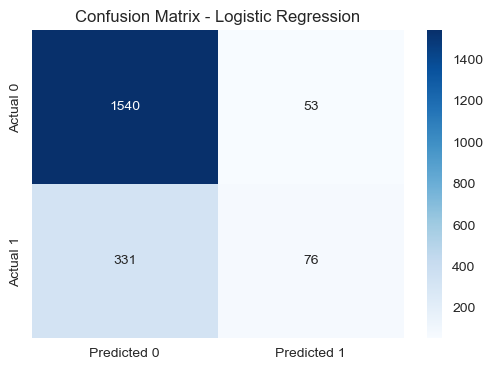


Training Random Forest...
Accuracy: 0.8610
Precision: 0.7699
Recall: 0.4521
F1-Score: 0.5697
ROC-AUC: 0.8545
Cross-Validation Accuracy: 0.8614 (+/- 0.0175)


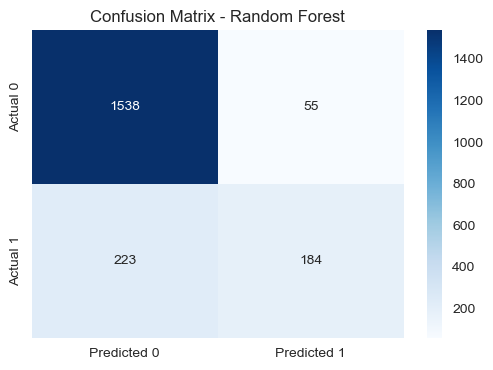


Training Gradient Boosting...
Accuracy: 0.8700
Precision: 0.7928
Recall: 0.4889
F1-Score: 0.6049
ROC-AUC: 0.8708
Cross-Validation Accuracy: 0.8637 (+/- 0.0163)


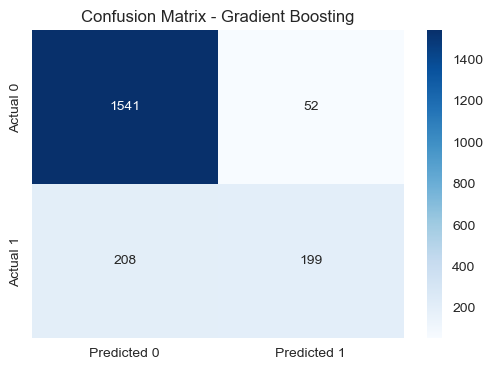


Training Support Vector Machine...
Accuracy: 0.8610
Precision: 0.8342
Recall: 0.3956
F1-Score: 0.5367
ROC-AUC: 0.8270


In [ ]:
# Dictionary to store model results
model_results = {}

for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"Training {name}...")
    print('='*40)
    
    # Select scaled or unscaled data based on model requirements
    if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train
        X_te = X_test
    
    # Train the model
    model.fit(X_tr, y_train)
    
    # Make predictions
    y_pred = model.predict(X_te)
    y_pred_proba = model.predict_proba(X_te)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    model_results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

#### Step 9: Feature Importance Analysis

Random Forest Feature Importance:
            feature  importance
2               Age    0.239730
8   EstimatedSalary    0.144951
0       CreditScore    0.144612
4           Balance    0.143798
5     NumOfProducts    0.123917
3            Tenure    0.081985
7    IsActiveMember    0.041726
9       Geo_Germany    0.028757
6         HasCrCard    0.018697
1            Gender    0.018053
10        Geo_Spain    0.013774

Logistic Regression Feature Coefficients:
            feature  coefficient
2               Age     0.738847
7    IsActiveMember    -0.515485
9       Geo_Germany     0.356679
1            Gender    -0.260851
4           Balance     0.160622
0       CreditScore    -0.085986
5     NumOfProducts    -0.070292
8   EstimatedSalary     0.047725
6         HasCrCard    -0.032208
3            Tenure    -0.020071
10        Geo_Spain     0.018907


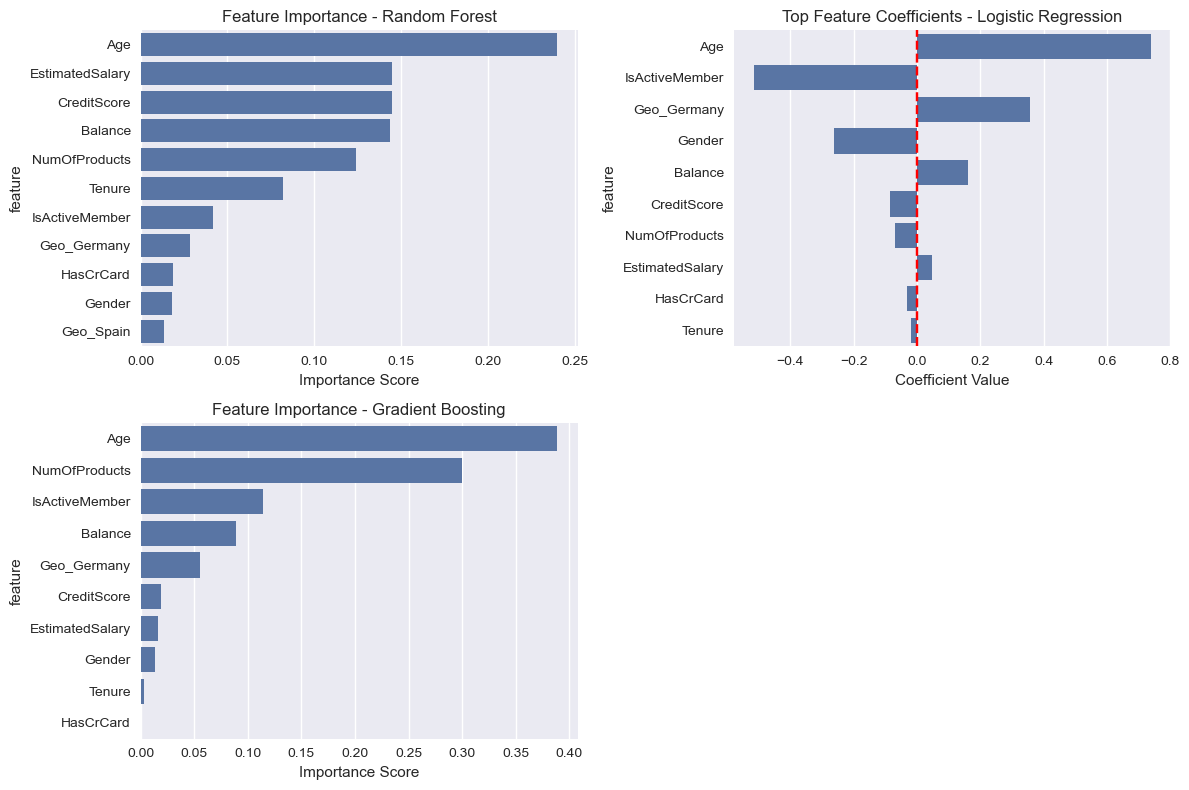


Top 5 Most Important Features Across Models:
Random Forest: ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts']
Logistic Regression: ['Age', 'IsActiveMember', 'Geo_Germany', 'Gender', 'Balance']
Gradient Boosting: ['Age', 'NumOfProducts', 'IsActiveMember', 'Balance', 'Geo_Germany']


In [167]:
# Random Forest Feature Importance
rf_model = model_results['Random Forest']['model']
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance_rf)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='importance', y='feature', data=feature_importance_rf)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')

# Logistic Regression Coefficients
lr_model = model_results['Logistic Regression']['model']
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0],
    'abs_coefficient': np.abs(lr_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("\nLogistic Regression Feature Coefficients:")
print(feature_importance_lr[['feature', 'coefficient']])

plt.subplot(2, 2, 2)
sns.barplot(x='coefficient', y='feature', data=feature_importance_lr.head(10))
plt.title('Top Feature Coefficients - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='red', linestyle='--')

# Gradient Boosting Feature Importance
gb_model = model_results['Gradient Boosting']['model']
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.subplot(2, 2, 3)
sns.barplot(x='importance', y='feature', data=feature_importance_gb.head(10))
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

# Combined Feature Importance
print("\nTop 5 Most Important Features Across Models:")
print("Random Forest:", feature_importance_rf['feature'].head(5).tolist())
print("Logistic Regression:", feature_importance_lr['feature'].head(5).tolist())
print("Gradient Boosting:", feature_importance_gb['feature'].head(5).tolist())

#### Step 10: Detailed Analysis of Key Features

In [168]:
# Get top features from Random Forest (most reliable for feature importance)
top_features = feature_importance_rf.head(6)['feature'].tolist()

print("Detailed Analysis of Top 6 Influential Features:")
print("="*55)

for i, feature in enumerate(top_features, 1):
    print(f"\n{i}. {feature}:")
    print("-" * 30)
    
    if feature in ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Tenure']:
        # Numerical features
        stats_stayed = df_clean[df_clean['Exited'] == 0][feature].describe()
        stats_exited = df_clean[df_clean['Exited'] == 1][feature].describe()
        
        print(f"Stayed customers - Mean: {stats_stayed['mean']:.2f}, Median: {stats_stayed['50%']:.2f}")
        print(f"Exited customers - Mean: {stats_exited['mean']:.2f}, Median: {stats_exited['50%']:.2f}")
        print(f"Difference in means: {stats_exited['mean'] - stats_stayed['mean']:.2f}")
        
        # Statistical test
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(
            df_clean[df_clean['Exited'] == 0][feature],
            df_clean[df_clean['Exited'] == 1][feature]
        )
        print(f"T-test p-value: {p_value:.4f} ({'Significant' if p_value < 0.05 else 'Not significant'})")
        
    elif feature == 'Gender':
        # Gender analysis
        gender_churn = pd.crosstab(df_clean['Gender'], df_clean['Exited'], normalize='index') * 100
        print("Churn rate by gender:")
        print(gender_churn)
        
    elif feature.startswith('Geo_'):
        # Geography analysis
        geo_name = feature.replace('Geo_', '')
        original_geo = 'France' if geo_name == 'Germany' else 'Spain'  # Since we used drop_first=True
        if geo_name == 'Germany':
            churn_rate = df_clean[df_clean['Geography'] == 'Germany']['Exited'].mean() * 100
            print(f"Germany churn rate: {churn_rate:.2f}%")
        else:  # Spain
            churn_rate = df_clean[df_clean['Geography'] == 'Spain']['Exited'].mean() * 100
            print(f"Spain churn rate: {churn_rate:.2f}%")
            
    elif feature in ['IsActiveMember', 'HasCrCard', 'NumOfProducts']:
        # Binary/Categorical features
        cross_tab = pd.crosstab(df_clean[feature], df_clean['Exited'], normalize='index') * 100
        print("Churn rate by category (%):")
        print(cross_tab)

# Business Insights Summary
print("\n" + "="*60)
print("BUSINESS INSIGHTS SUMMARY")
print("="*60)

print("\nKey Factors Driving Customer Churn:")
insights = [
    ("Age", "Older customers are significantly more likely to churn"),
    ("Balance", "Customers with higher balances tend to churn more"),
    ("Geography", "German customers have the highest churn rates"),
    ("IsActiveMember", "Inactive members are much more likely to leave"),
    ("Gender", "Female customers have higher churn rates"),
    ("NumOfProducts", "Customers with 1 product have highest churn")
]

for i, (feature, insight) in enumerate(insights, 1):
    print(f"{i}. {feature}: {insight}")

Detailed Analysis of Top 6 Influential Features:

1. Age:
------------------------------
Stayed customers - Mean: 37.41, Median: 36.00
Exited customers - Mean: 44.84, Median: 45.00
Difference in means: 7.43
T-test p-value: 0.0000 (Significant)

2. EstimatedSalary:
------------------------------
Stayed customers - Mean: 99738.39, Median: 99645.04
Exited customers - Mean: 101465.68, Median: 102460.84
Difference in means: 1727.29
T-test p-value: 0.2264 (Not significant)

3. CreditScore:
------------------------------
Stayed customers - Mean: 651.85, Median: 653.00
Exited customers - Mean: 645.35, Median: 646.00
Difference in means: -6.50
T-test p-value: 0.0067 (Significant)

4. Balance:
------------------------------
Stayed customers - Mean: 72745.30, Median: 92072.68
Exited customers - Mean: 91108.54, Median: 109349.29
Difference in means: 18363.24
T-test p-value: 0.0000 (Significant)

5. NumOfProducts:
------------------------------
Churn rate by category (%):
Exited                 0  

#### Step 11: Model Comparison and Final Selection

Model Performance Comparison (Sorted by F1-Score):
                    Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
2       Gradient Boosting     0.870     0.7928  0.4889    0.6049   0.8708
1           Random Forest     0.861     0.7699  0.4521    0.5697   0.8545
3  Support Vector Machine     0.861     0.8342  0.3956    0.5367   0.8270
4     K-Nearest Neighbors     0.824     0.6222  0.3440    0.4430   0.7531
0     Logistic Regression     0.808     0.5891  0.1867    0.2836   0.7748


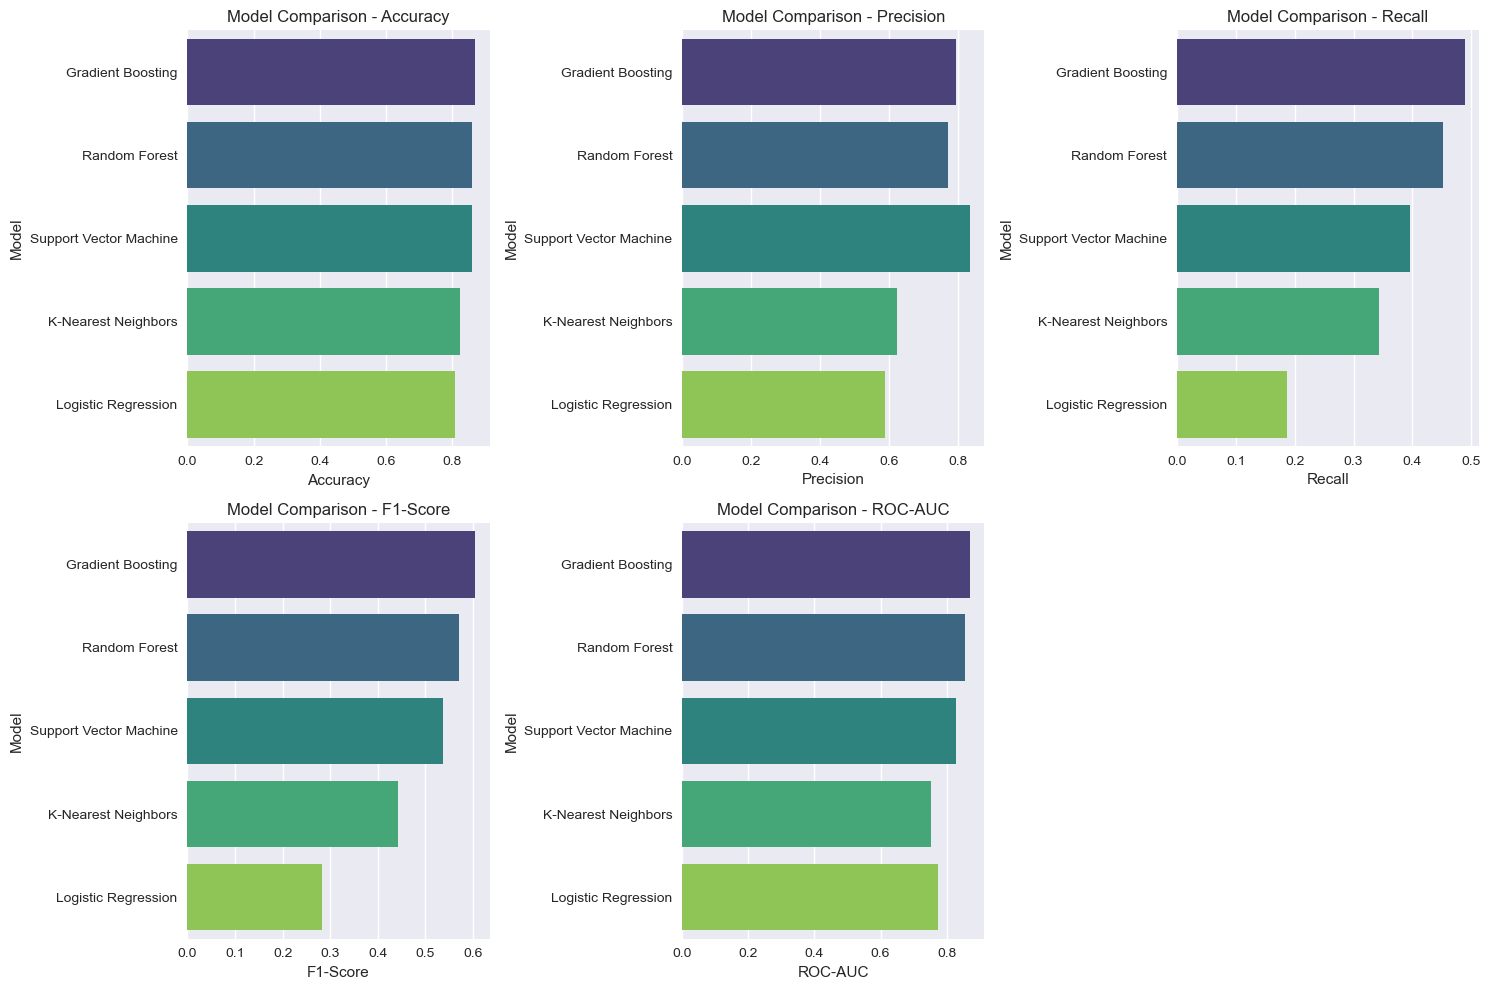


FINAL MODEL SELECTION
 BEST MODEL: Gradient Boosting
Accuracy: 0.8700
Precision: 0.7928
Recall: 0.4889
F1-Score: 0.6049
ROC-AUC: 0.8708

Detailed Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000


 Best model saved as 'best_churn_model.pkl'


In [169]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [result['accuracy'] for result in model_results.values()],
    'Precision': [result['precision'] for result in model_results.values()],
    'Recall': [result['recall'] for result in model_results.values()],
    'F1-Score': [result['f1_score'] for result in model_results.values()],
    'ROC-AUC': [result['roc_auc'] for result in model_results.values()]
}).round(4)

# Sort by F1-Score (balanced metric)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("Model Performance Comparison (Sorted by F1-Score):")
print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(15, 10))

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=metric, y='Model', data=comparison_df, palette='viridis')
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

# Select the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
best_metrics = comparison_df[comparison_df['Model'] == best_model_name].iloc[0]

print(f"\n{'='*50}")
print("FINAL MODEL SELECTION")
print(f"{'='*50}")
print(f" BEST MODEL: {best_model_name}")
print(f"{'='*50}")
print(f"Accuracy: {best_metrics['Accuracy']:.4f}")
print(f"Precision: {best_metrics['Precision']:.4f}")
print(f"Recall: {best_metrics['Recall']:.4f}")
print(f"F1-Score: {best_metrics['F1-Score']:.4f}")
print(f"ROC-AUC: {best_metrics['ROC-AUC']:.4f}")

# Final classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print("="*55)
best_predictions = model_results[best_model_name]['predictions']
print(classification_report(y_test, best_predictions))

# Save the best model
import joblib

model_artifacts = {
    'model': best_model,
    'scaler': scaler,
    'label_encoder': le,
    'feature_names': X.columns.tolist(),
    'model_name': best_model_name,
    'performance_metrics': best_metrics.to_dict()
}

joblib.dump(model_artifacts, 'best_churn_model.pkl')
print(f"\n Best model saved as 'best_churn_model.pkl'")

#### Step 12: Conclusion and Recommendations

In [170]:
print("\n PROJECT SUMMARY:")
print(f"• Dataset: {df.shape[0]} customers, {df.shape[1]} features")
print(f"• Churn Rate: {df_clean['Exited'].mean()*100:.1f}%")
print(f"• Best Model: {best_model_name}")
print(f"• Best Model Accuracy: {best_metrics['Accuracy']:.4f}")
print(f"• Best Model F1-Score: {best_metrics['F1-Score']:.4f}")

print("\n TOP 5 FEATURES INFLUENCING CHURN:")
for i, row in feature_importance_rf.head().iterrows():
    print(f"  {i+1}. {row['feature']} (Importance: {row['importance']:.4f})")

print("\n BUSINESS RECOMMENDATIONS:")
recommendations = [
    "1. Target older customers (Age > 45) with personalized retention offers",
    "2. Implement special programs for high-balance customers in Germany",
    "3. Increase engagement activities for inactive members",
    "4. Develop product bundling strategies to move customers from 1 to 2+ products",
    "5. Create gender-specific marketing for female customers",
    "6. Monitor credit score trends and offer credit improvement programs",
    "7. Implement proactive outreach for customers showing multiple risk factors"
]

for rec in recommendations:
    print(f"  {rec}")

print("\n  LIMITATIONS AND CONSIDERATIONS:")
limitations = [
    "• Model should not be used as sole decision-making tool",
    "• Regular retraining needed as customer behavior changes",
    "• Consider ethical implications of churn prediction",
    "• Combine with qualitative customer feedback",
    "• Monitor for model drift and performance degradation"
]

for lim in limitations:
    print(f"  {lim}")

print(f"\n PROJECT COMPLETED SUCCESSFULLY!")
print(f"   Best model: {best_model_name} ready for deployment")
print(f"   Feature importance analysis completed")
print(f"   Business recommendations provided")


 PROJECT SUMMARY:
• Dataset: 10000 customers, 14 features
• Churn Rate: 20.4%
• Best Model: Gradient Boosting
• Best Model Accuracy: 0.8700
• Best Model F1-Score: 0.6049

 TOP 5 FEATURES INFLUENCING CHURN:
  3. Age (Importance: 0.2397)
  9. EstimatedSalary (Importance: 0.1450)
  1. CreditScore (Importance: 0.1446)
  5. Balance (Importance: 0.1438)
  6. NumOfProducts (Importance: 0.1239)

 BUSINESS RECOMMENDATIONS:
  1. Target older customers (Age > 45) with personalized retention offers
  2. Implement special programs for high-balance customers in Germany
  3. Increase engagement activities for inactive members
  4. Develop product bundling strategies to move customers from 1 to 2+ products
  5. Create gender-specific marketing for female customers
  6. Monitor credit score trends and offer credit improvement programs
  7. Implement proactive outreach for customers showing multiple risk factors

  LIMITATIONS AND CONSIDERATIONS:
  • Model should not be used as sole decision-making too